In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
#read dataset
df = pd.read_csv("imdb_top_1000.csv")

In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.sample(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
434,https://m.media-amazon.com/images/M/MV5BNjhjOD...,The Hustler,1961,A,134 min,"Drama, Sport",8.0,An up-and-coming pool player plays a long-time...,90.0,Robert Rossen,Paul Newman,Jackie Gleason,Piper Laurie,George C. Scott,75067,"8,284,000"
176,https://m.media-amazon.com/images/M/MV5BMjk3Yj...,The Message,1976,PG,177 min,"Biography, Drama, History",8.2,This epic historical drama chronicles the life...,NaN,Moustapha Akkad,Anthony Quinn,Irene Papas,Michael Ansara,Johnny Sekka,43885,NaN
105,https://m.media-amazon.com/images/M/MV5BODM4Nj...,Idi i smotri,1985,A,142 min,"Drama, Thriller, War",8.3,"After finding an old rifle, a young boy joins ...",NaN,Elem Klimov,Aleksey Kravchenko,Olga Mironova,Liubomiras Laucevicius,Vladas Bagdonas,59056,NaN
733,https://m.media-amazon.com/images/M/MV5BODAzND...,Birdman or (The Unexpected Virtue of Ignorance),2014,A,119 min,"Comedy, Drama",7.7,A washed-up superhero actor attempts to revive...,87.0,Alejandro G. Iñárritu,Michael Keaton,Zach Galifianakis,Edward Norton,Andrea Riseborough,580291,"42,340,598"
461,https://m.media-amazon.com/images/M/MV5BMzg2MW...,All Quiet on the Western Front,1930,U,152 min,"Drama, War",8.0,"A German youth eagerly enters World War I, but...",91.0,Lewis Milestone,Lew Ayres,Louis Wolheim,John Wray,Arnold Lucy,57318,"3,270,000"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [7]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Data Cleaning

In [8]:
#duplicated data
df[df.duplicated()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


- no duplicated data

In [9]:
#unnecessary data 
df.drop(['Poster_Link', 'Series_Title','Poster_Link', 'Series_Title','Overview'],axis=1,inplace=True)

In [10]:
# null data
df.isnull().sum()

Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [11]:
#Certificate      
df['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [12]:
#because the most movies is "U" :General Viewing for all ages 
df['Certificate'].fillna('U',inplace=True)

In [13]:
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

In [14]:
df['Gross'].value_counts()

4,360,000      5
25,000,000     2
5,450,000      2
5,321,508      2
9,600,000      2
              ..
106,662        1
10,950         1
4,018,695      1
141,319,928    1
30,500,000     1
Name: Gross, Length: 823, dtype: int64

In [15]:
#convert type to int to deal with it 
df["Gross"] = df["Gross"].str.replace(",","")
df["Gross"] = df["Gross"].replace(np.nan, 0)
df["Gross"] = df["Gross"].astype(int)

In [16]:
# fill null data with the avg gross
df["Gross"] = df["Gross"].replace(0,df['Gross'].mean())

In [17]:
df.isnull().sum()

Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [18]:
# null data is handled

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  1000 non-null   object 
 1   Certificate    1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     1000 non-null   float64
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [20]:
#validate column types
df["Runtime"] = df["Runtime"].str.extract('([^\s]+)')
df["Runtime"] = df["Runtime"][~(df["Runtime"] == "min")]
df["Runtime"] = df["Runtime"].astype(int)

In [21]:
df['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [22]:
#drop row contain 'PG' to convert the column to int datatype
df = df.drop(labels=966, axis=0)

In [23]:
df['Released_Year']=df['Released_Year'].astype(int)

In [24]:
# columns types is valid 

In [25]:
#Data visualization

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'UA'),
  Text(2, 0, 'U'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'R'),
  Text(5, 0, 'PG'),
  Text(6, 0, 'G'),
  Text(7, 0, 'Passed'),
  Text(8, 0, 'TV-14'),
  Text(9, 0, '16'),
  Text(10, 0, 'TV-MA'),
  Text(11, 0, 'Unrated'),
  Text(12, 0, 'GP'),
  Text(13, 0, 'Approved'),
  Text(14, 0, 'TV-PG'),
  Text(15, 0, 'U/A')])

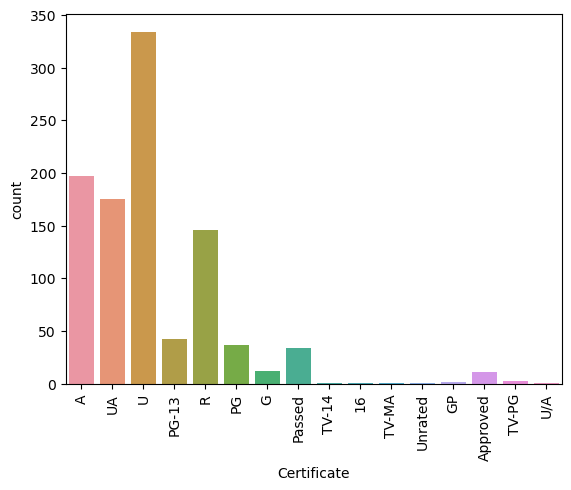

In [26]:
sns.countplot('Certificate',data=df)
plt.xticks(rotation = 'vertical')

### most movies was 'U' IMDB certificate i.e suitable for all ages

In [27]:
top_rates=df.groupby('Genre').mean().sort_values('IMDB_Rating',ascending=False).head(10)
top_rates = top_rates[['IMDB_Rating']].round(2)
top_rates.reset_index(inplace=True)
top_rates

,Genre,IMDB_Rating
0,"Animation, Drama, War",8.50
1,"Drama, Musical",8.40
2,"Action, Sci-Fi",8.40
3,"Drama, Mystery, War",8.35
4,Western,8.35
5,"Crime, Drama, Music",8.30
6,"Mystery, Romance, Thriller",8.30
7,"Adventure, Mystery, Thriller",8.30
8,"Drama, Fantasy, Horror",8.30
9,"Comedy, Musical, Romance",8.30


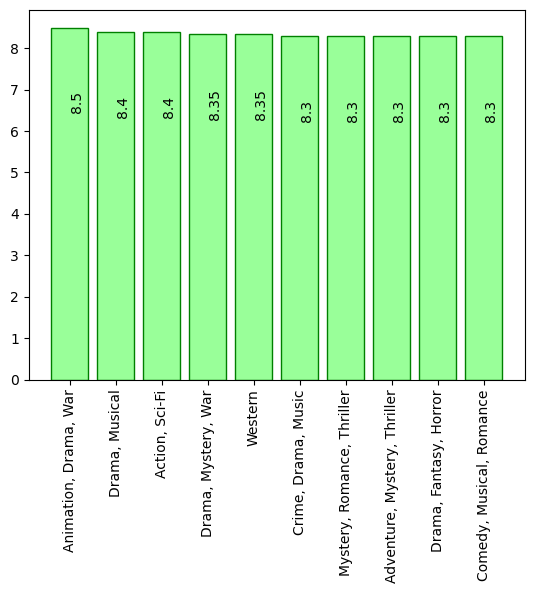

In [28]:
plt.bar(top_rates['Genre'],top_rates['IMDB_Rating'],color='#99ff99',edgecolor='green' )
plt.xticks(rotation='vertical')
for k,v in top_rates['IMDB_Rating'].items():
    plt.text(k,v-2,str(v),rotation=90)

### movies whos genre 'Animation, Drama, War' acieved the most rate

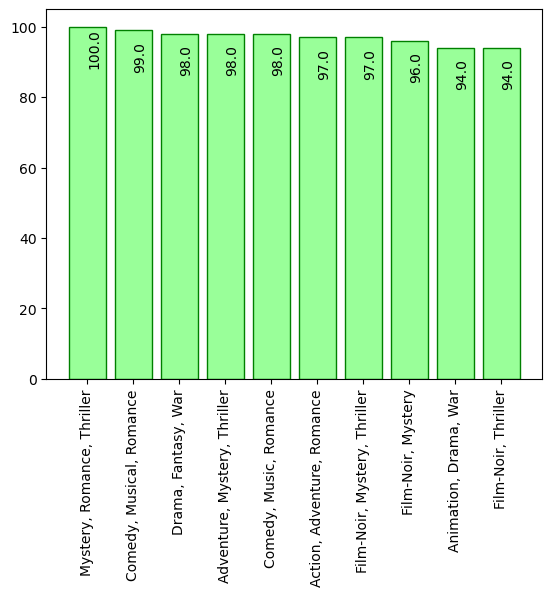

In [29]:
top_rates=df.groupby('Genre').mean().sort_values('Meta_score',ascending=False).head(10)
top_rates = top_rates[['Meta_score']].round(2)
top_rates.reset_index(inplace=True)

plt.bar(top_rates['Genre'],top_rates['Meta_score'],color='#99ff99',edgecolor='green' )
plt.xticks(rotation='vertical')
for k,v in top_rates['Meta_score'].items():
    plt.text(k,v-11,str(v),rotation=90)

### movies whose genre 'Mystery, Romance, Thriller' achieved higher meta score

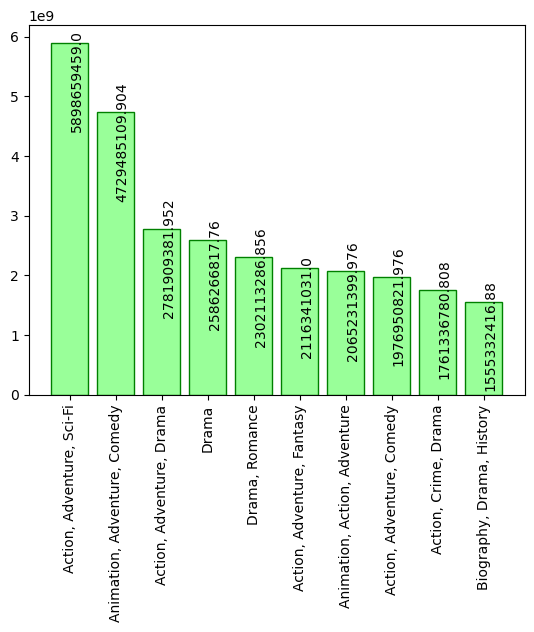

In [30]:
top_earn = df.groupby('Genre').sum().sort_values('Gross',ascending=False).head(10)
top_earn=top_earn[['Gross']]
top_earn.reset_index(inplace=True)

plt.bar(top_earn['Genre'],top_earn['Gross'],color='#99ff99',edgecolor='green')
plt.xticks(rotation='vertical')
for k,v in top_earn['Gross'].items():
    plt.text(k,v-1450000000,str(v),rotation=90)

### movies whose genre 'Action,Adventure ,Sci-Fi' achieve the most earnings

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Gross'>

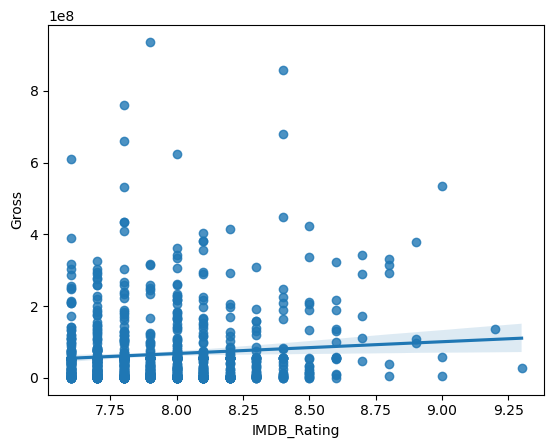

In [31]:
sns.regplot(x='IMDB_Rating',y='Gross',data=df)

### there's week positive relationship between IMDB rating and earnings of the movie

<AxesSubplot:xlabel='Meta_score', ylabel='Gross'>

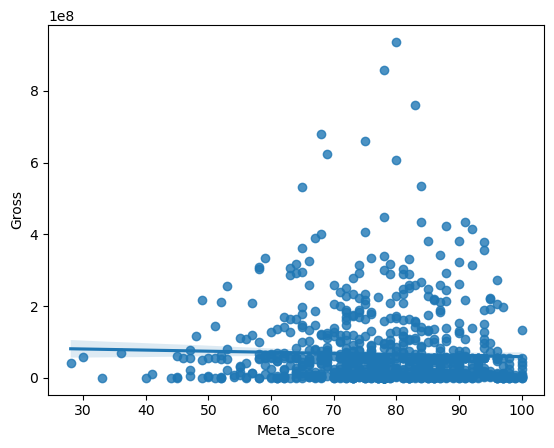

In [32]:
sns.regplot(x='Meta_score',y='Gross',data=df)

### approximately the higher meta score movie gain the higher earnings

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'UA'),
  Text(2, 0, 'U'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'R'),
  Text(5, 0, 'PG'),
  Text(6, 0, 'G'),
  Text(7, 0, 'Passed'),
  Text(8, 0, 'TV-14'),
  Text(9, 0, '16'),
  Text(10, 0, 'TV-MA'),
  Text(11, 0, 'Unrated'),
  Text(12, 0, 'GP'),
  Text(13, 0, 'Approved'),
  Text(14, 0, 'TV-PG'),
  Text(15, 0, 'U/A')])

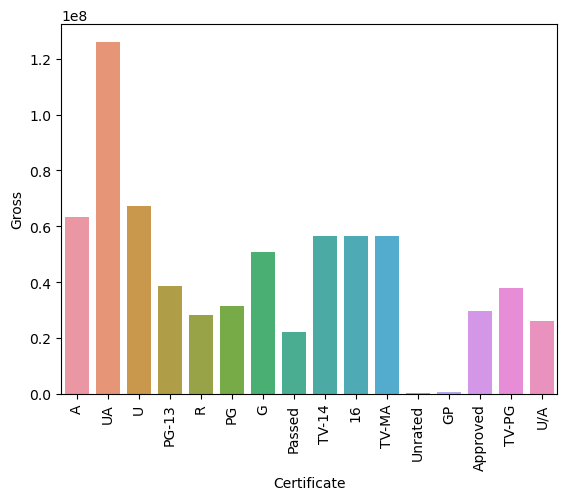

In [33]:
sns.barplot(x='Certificate',y='Gross',data=df,ci=False)
plt.xticks(rotation='vertical')

### movies whose certificates 'UA' acheived more earnings

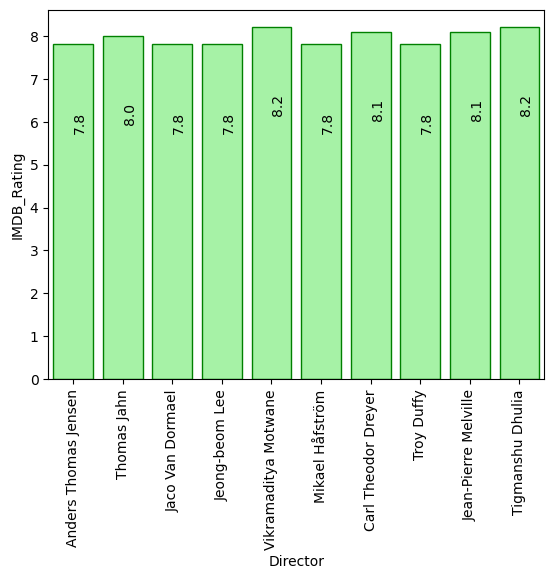

In [34]:
top_director=df.groupby('Director').mean().sort_values('Gross').head(10)
top_director=top_director[['IMDB_Rating']]
top_director.reset_index(inplace=True)

sns.barplot(x='Director',y='IMDB_Rating',data=top_director,color='#99ff99',edgecolor='green')
plt.xticks(rotation='vertical')

for k,v in top_director['IMDB_Rating'].items():
    plt.text(k,v-2,str(v),rotation=90)

###  The director  'Tigmanshu Dhulia' achieved the most high imdb rates 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Runtime', ylabel='IMDB_Rating'>

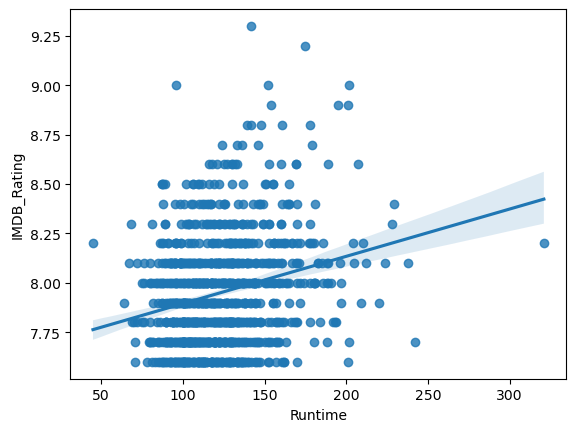

In [35]:
sns.regplot('Runtime','IMDB_Rating',data=df)

### there is strong relation between Runtime and the rate of movie 

<AxesSubplot:xlabel='Runtime', ylabel='Meta_score'>

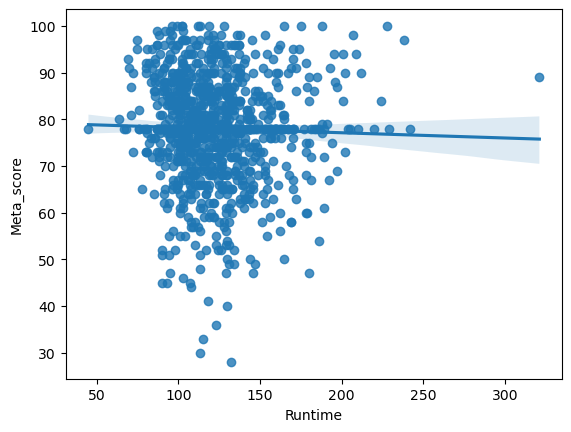

In [36]:
sns.regplot('Runtime','Meta_score',data=df)

### approximately there is no relation between Run time and meta score